# Logistic Regression using Python

First, we will change the location in which the python notebook is open.

In [1]:
import os

In [2]:
%pwd

'c:\\Users\\rahul\\Desktop\\Project\\Machine-Learning-using-Python\\02. Logistic Regression'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\rahul\\Desktop\\Project\\Machine-Learning-using-Python'

## Problem Statement

> The Rain in Australia dataset contains about 10 years of daily weather observations from numerous Australian weather stations. As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.




##### Downloading the Dataset

We will be using opendatasets to download the dataset.

In [5]:
import opendatasets as od

In [6]:
od.version()

'0.1.22'

In [7]:
dataset_url = "https://www.kaggle.com/jsphyg/weather-dataset-rattle-package"

In [8]:
od.download(dataset_url, data_dir = "Dataset")

Skipping, found downloaded files in "Dataset\weather-dataset-rattle-package" (use force=True to force download)


In [9]:
data_dir = "Dataset/weather-dataset-rattle-package"

In [10]:
os.listdir(data_dir)

['weatherAUS.csv']

In [11]:
train_csv = data_dir + "/weatherAUS.csv"

In [12]:
import pandas as pd

In [13]:
raw_df = pd.read_csv(train_csv)

In [14]:
raw_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [15]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [16]:
raw_df.dropna(subset = ["RainToday", "RainTomorrow"], inplace = True)

In [17]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

#### Exploratory Data Analysis and Visualization

In [18]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

In [19]:
px.histogram(
    data_frame = raw_df,
    x = "Location",
    title = "Locations vs. Rainy Days",
    color = "RainToday"
)

In [20]:
px.histogram(
    data_frame = raw_df,
    x = "Temp3pm",
    title = "Temp3pm vs. Rainy Days",
    color = "RainTomorrow"
)

In [21]:
px.histogram(
    data_frame = raw_df,
    x = "RainTomorrow",
    color = "RainToday",
    title = "Rain Tomorrow vs. RainToday"
)

In [22]:
px.scatter(
    data_frame = raw_df.sample(2000),
    x = "MinTemp",
    y = "MaxTemp",
    title = "MinTemp vs. MaxTemp",
    color = "RainToday",
    hover_data = ["RainTomorrow"]
    )

In [23]:
px.scatter(
    data_frame = raw_df.sample(2000),
    x = "Temp3pm",
    y = "Humidity3pm",
    title = "Temp3p vs. Humidity3p",
    color = "RainTomorrow",
    hover_data = ["RainToday"]
    )

In [24]:
px.scatter(
    data_frame = raw_df.sample(2000),
    x = "WindSpeed3pm",
    y = "Pressure3pm",
    title = "WindSpeed3pm vs. Pressure3pm",
    color = "RainTomorrow",
    hover_data = ["RainToday"]
    )

#### Training, validation and Test dataset

- **Training Dataset** - used to train the model.
- **Validation Dataset** - used to evaluate the model during the training process.
- **Test Dataset** - used to compare different models or approaches and report then model's final accuracy.

A general rule is to separate the training datase for 60% and other both datasets(validation and test dataset) to be 20% data each.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_val_df, test_df = train_test_split(
    raw_df, 
    test_size = 0.2, 
    random_state = 7, 
    shuffle = True
    )

In [27]:
train_df, val_df = train_test_split(
    train_val_df,
    test_size = 0.25, 
    random_state = 7, 
    shuffle = True
    )

In [28]:
dataframes = {"train_df": train_df, 
              "val_df": val_df, 
              "test_df": test_df}

for name, df in dataframes.items():
    print(f"{name}.shape: {df.shape}")

train_df.shape: (84471, 23)
val_df.shape: (28158, 23)
test_df.shape: (28158, 23)


While working with the dates it's often a better idea to separate the training, validation, test datasets based on time, so that the model is trained on the past data is predicting the future.

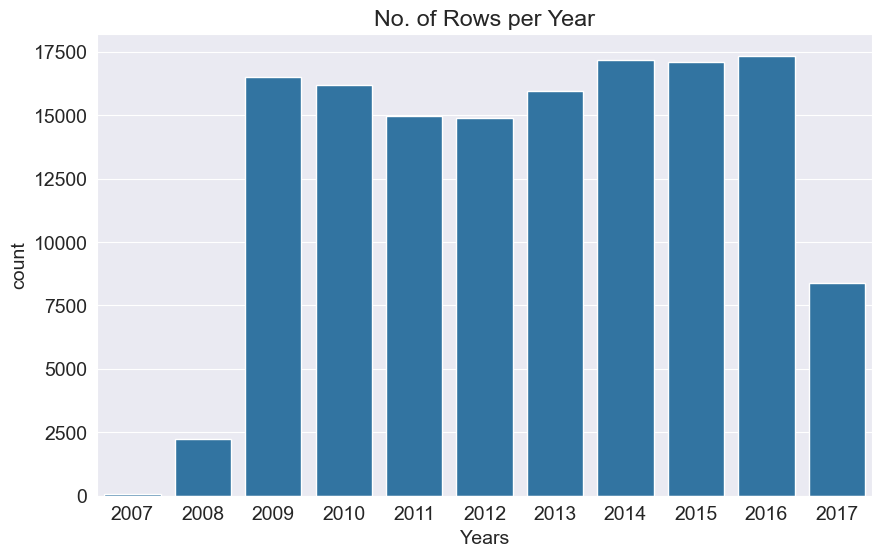

In [29]:
plt.title("No. of Rows per Year")
sns.countplot(
    x = pd.to_datetime(raw_df.Date).dt.year
)
plt.xlabel("Years")
plt.show()

In [30]:
year = pd.to_datetime(raw_df.Date).dt.year

In [31]:
traing_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [32]:
dataframes = {"train_df": train_df, 
              "val_df": val_df, 
              "test_df": test_df}

for name, df in dataframes.items():
    print(f"{name}.shape: {df.shape}")

train_df.shape: (84471, 23)
val_df.shape: (17089, 23)
test_df.shape: (25710, 23)


#### Identifying Input and Target Columns

In [33]:
raw_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [34]:
input_cols = list(raw_df.columns)[1:-1]
target_col = "RainTomorrow"

In [35]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [36]:
print(target_col)

RainTomorrow


In [37]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

In [38]:
val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

In [39]:
test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

In [40]:
import numpy as np

In [41]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
cat_cols = train_inputs.select_dtypes("object").columns.tolist()

In [42]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  84193.000000  84274.000000  84471.000000  48678.000000  44485.000000   
mean      12.180686     23.224604      2.333284      5.461757      7.625824   
std        6.392758      7.098724      8.496572      4.143840      3.782821   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.600000     17.900000      0.000000      2.600000      4.900000   
50%       12.000000     22.600000      0.000000      4.800000      8.500000   
75%       16.800000     28.300000      0.600000      7.400000     10.600000   
max       33.900000     48.100000    371.000000     81.200000     14.500000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   79013.000000  83822.000000  82928.000000  83590.000000  82398.000000   
mean       39.917786     13.979433     18.611639     68.774830     51.443785   
std        13.516214      8.874556      8.779322     19.090343     20.805599   
min         7.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000    130.000000     83.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  76239.000000  76227.000000  52819.000000  50785.000000  84101.000000   
mean    1017.659548   1015.273464      4.425737      4.497489     16.988476   
std        7.087574      7.020153      2.882720      2.714215      6.486749   
min      982.000000    978.200000      0.000000      0.000000     -7.000000   
25%     1013.000000   1010.500000      1.000000      2.000000     12.300000   
50%     1017.600000   1015.300000      5.000000      5.000000     16.700000   
75%     1022.400000   1020.000000      7.000000      7.000000     21.500000   
max     1040.600000   1038.500000      9.000000      9.000000     40.200000   

            Temp3pm  
count  82912.000000  
mean      21.682091  
std        6.921929  
min       -5.100000  
25%       16.600000  
50%       21.100000  
75%       26.400000  
max       46.700000

In [43]:
train_inputs[cat_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

#### Imputing the missing values

Machine Learning models can not run with missing data. The process of filling missing values is known as Imputing.

In [44]:
from sklearn.impute import SimpleImputer

In [45]:
imputer = SimpleImputer(strategy = "mean")

In [46]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [47]:
train_inputs[numeric_cols].isna().sum()

MinTemp            278
MaxTemp            197
Rainfall             0
Evaporation      35793
Sunshine         39986
WindGustSpeed     5458
WindSpeed9am       649
WindSpeed3pm      1543
Humidity9am        881
Humidity3pm       2073
Pressure9am       8232
Pressure3pm       8244
Cloud9am         31652
Cloud3pm         33686
Temp9am            370
Temp3pm           1559
dtype: int64

In [48]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [49]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

In [50]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [51]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

#### Scaling numerical features

In [52]:
raw_df[numeric_cols].describe()

MinTemp       MaxTemp       Rainfall   Evaporation      Sunshine  \
count  140319.000000  140480.00000  140787.000000  81093.000000  73982.000000   
mean       12.184824      23.23512       2.349974      5.472516      7.630540   
std         6.403879       7.11450       8.465173      4.189132      3.781729   
min        -8.500000      -4.80000       0.000000      0.000000      0.000000   
25%         7.600000      17.90000       0.000000      2.600000      4.900000   
50%        12.000000      22.60000       0.000000      4.800000      8.500000   
75%        16.800000      28.30000       0.800000      7.400000     10.700000   
max        33.900000      48.10000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  131682.000000  139732.000000  138256.000000  139270.000000   
mean       39.970520      13.990496      18.631141      68.826833   
std        13.578201       8.886210       8.798096      19.063650   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   
50%        39.000000      13.000000      19.000000      70.000000   
75%        48.000000      19.000000      24.000000      83.000000   
max       135.000000     130.000000      87.000000     100.000000   

         Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count  137286.000000  127044.000000  127018.000000  88162.000000   
mean       51.449288    1017.654577    1015.257963      4.431161   
std        20.807310       7.104867       7.035411      2.886594   
min         0.000000     980.500000     977.100000      0.000000   
25%        37.000000    1013.000000    1010.400000      1.000000   
50%        52.000000    1017.600000    1015.200000      5.000000   
75%        66.000000    1022.400000    1020.000000      7.000000   
max       100.000000    1041.000000    1039.600000      9.000000   

           Cloud3pm        Temp9am        Temp3pm  
count  84693.000000  140131.000000  138163.000000  
mean       4.499250      16.987066      21.693183  
std        2.719752       6.496012       6.937784  
min        0.000000      -7.200000      -5.400000  
25%        2.000000      12.300000      16.600000  
50%        5.000000      16.700000      21.100000  
75%        7.000000      21.600000      26.400000  
max        9.000000      40.200000      46.700000

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [56]:
print("Minimum: ")
print(scaler.data_min_)

Minimum: 
[ -8.5  -4.8   0.    0.    0.    6.    0.    0.    0.    0.  980.5 977.1
   0.    0.   -7.2  -5.4]


In [57]:
print("Maximum: ")
print(scaler.data_max_)

Maximum: 
[  33.9   48.1  371.   145.    14.5  135.   130.    87.   100.   100.
 1041.  1039.6    9.     9.    40.2   46.7]


In [58]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [59]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  84471.000000  84471.000000  84471.000000  84471.000000  84471.000000   
mean       0.487752      0.529766      0.006289      0.037699      0.526073   
std        0.150524      0.134035      0.022902      0.021694      0.189321   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.379717      0.429112      0.000000      0.027586      0.526244   
50%        0.483491      0.517958      0.000000      0.037741      0.526244   
75%        0.596698      0.623819      0.001617      0.037741      0.606897   
max        1.000000      1.000000      1.000000      0.560000      1.000000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   84471.000000  84471.000000  84471.000000  84471.000000  84471.000000   
mean        0.262955      0.107535      0.213931      0.687754      0.514439   
std         0.101335      0.068003      0.099986      0.189905      0.205487   
min         0.007752      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.214151      0.700000      0.514493   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      1.000000      0.954023      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  84471.000000  84471.000000  84471.000000  84471.000000  84471.000000   
mean       0.614199      0.610751      0.491974      0.499799      0.510305   
std        0.111295      0.106701      0.253279      0.233837      0.136551   
min        0.024793      0.017600      0.000000      0.000000      0.004219   
25%        0.545455      0.542400      0.333333      0.444444      0.411392   
50%        0.614125      0.610527      0.492351      0.499917      0.504219   
75%        0.682645      0.676800      0.666667      0.666667      0.605485   
max        0.993388      0.982400      1.000000      1.000000      1.000000   

            Temp3pm  
count  84471.000000  
mean       0.519814  
std        0.131627  
min        0.005758  
25%        0.424184  
50%        0.512476  
75%        0.608445  
max        1.000000